Zmierz się z problemem identyfikacji rodzaju szkła. W tym celu wykorzystaj jeden ze zbiorów danych
UCI - GLASS. Zadania powinny być wykonane z pomocą Pythona i/lub WEKI. Punktacja:
1. eksploracja danych – przedstaw podstawowe dane statystyczne i uwagi dotyczące cech i etykiet
zbioru danych. (10 punktów)
2. przygotowanie danych – podziel dane na zestaw uczący i walidacyjny (alternatywnie użyj walidacji krzyżowej), zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)
Bonus – usuń 5% wartości cech i przygotuj dane stosując metody radzenia sobie z brakującymi
danymi. (5 punktów)
3. klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)
4. ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki. (20
punktów)
4
Do zadania przygotuj raport zawierający krótki opis wszystkich wykonywanych kroków oraz rezultatów zadania (najlepiej zebranych tabeli) wraz z interpretacją. W raporcie wskaż wykorzystane
materiały źródłowe oraz krótko opisz biblioteki wykorzystane przy implementacji. Raport wyślij prowadzącemu przynajmniej na 24 godziny przed oddaniem listy.


Importowanie danych

In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data = pd.read_csv(data_url, names=column_names)


print(glass_data.head(20))

    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  14

d number: od 1 do 214 (usunięte z pliku CSV)

RI: współczynnik załamania światła
Na: Sód (jednostka miary: procent wagowy w odpowiednim tlenku, podobnie jak atrybuty 4-10)
Mg: Magnez
Al: aluminium
K: Potas
Ca: Wapń
Ba: Bar
Fe: Żelazo
Rodzaj szkła: (atrybut klasy) [1-7]
Building_windows_float_processed
Building_windows_non_float_processed
Vehicle_windows_float_processed
Vehicle_windows_non_float_processed
Pojemniki
Zastawa stołowa
Reflektory


eksploracja danych

In [2]:
glass_data.shape

(214, 11)

dataset ma 214 wierszy i 10 kolumn

In [3]:
glass_data.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

dataset nie ma brakujących danych

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


pokaz type

In [5]:
print(glass_data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


<Axes: xlabel='Type', ylabel='count'>

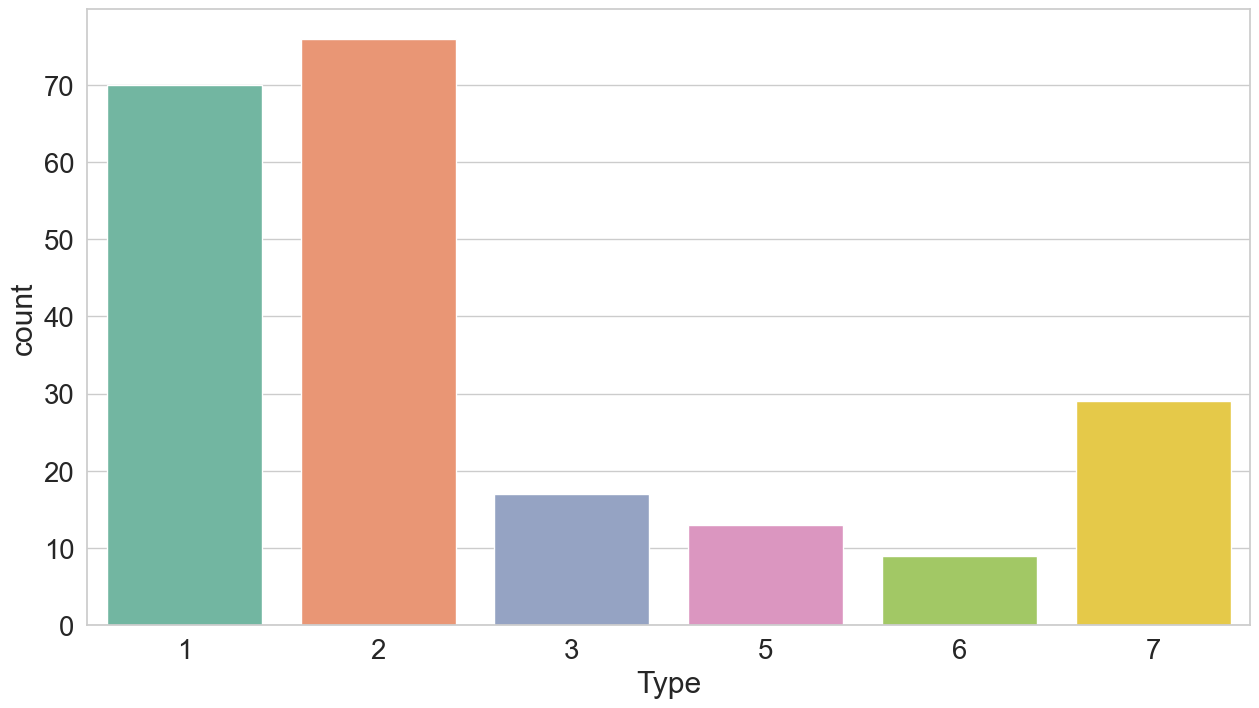

In [6]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x="Type", data=glass_data, palette="Set2")

In [7]:
print(glass_data.describe())

               Id          RI          Na          Mg          Al          Si   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

wynioski z eksploracji danych:
Powyższe statystyki pokazują, że dane we wszystkich atrybutach nie są w tym samym zakresie, więc najpierw znormalizujemy dane

przygotowanie danych

Usuwanie niepotrzebnej kolumny Id

In [8]:
glass_data.drop(['Id'], axis=1, inplace=True)
glass_data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


Odseparowanie kolumny klasy od reszty danych

In [9]:
y = glass_data['Type']

X = glass_data.drop('Type', axis=1)

X.shape

(214, 9)

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
y.shape

(214,)

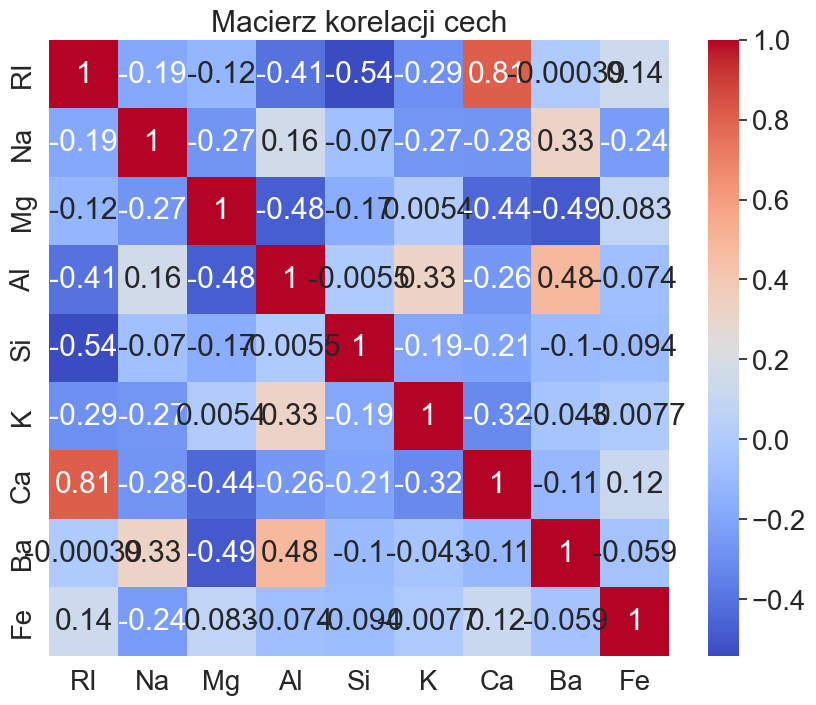

In [12]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()

Nasz wykres pokazuje korelację między różnymi cechami Wnioski:

RI i Ca mają silną korelację między sobą
AI i ba mają pośrednią korelację między sobą

Train Test Split Podział danych na zestaw uczący i walidacyjny


Najpierw zastosujemy model bez przetwarzania danych

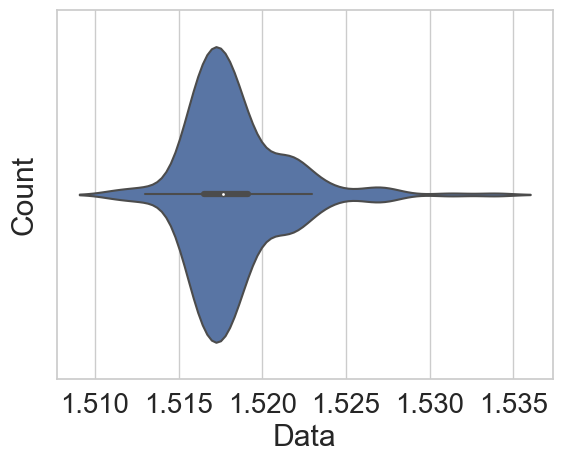

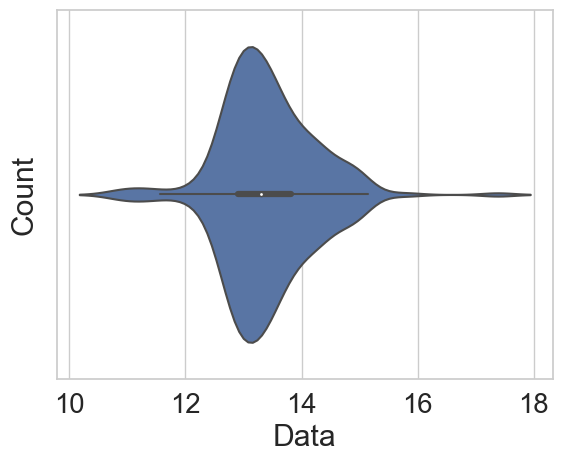

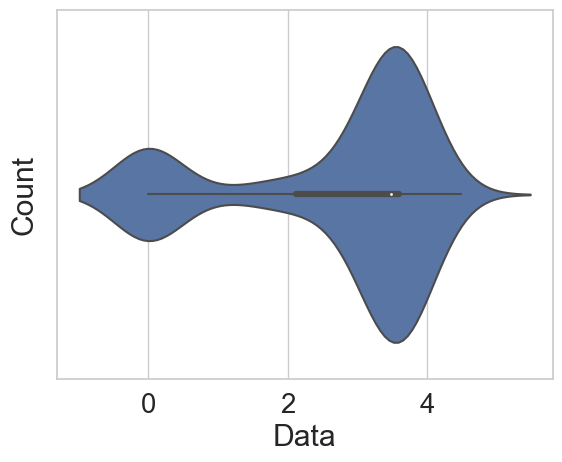

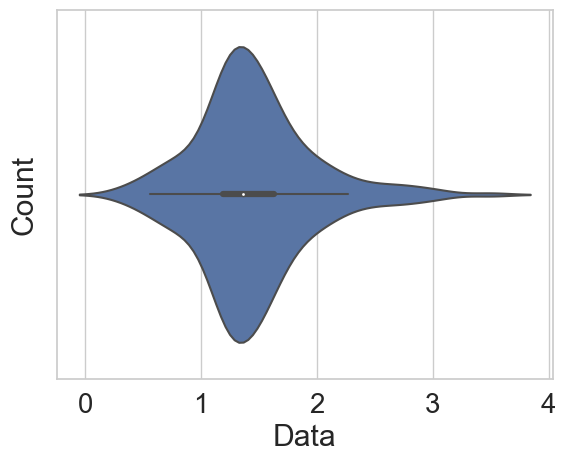

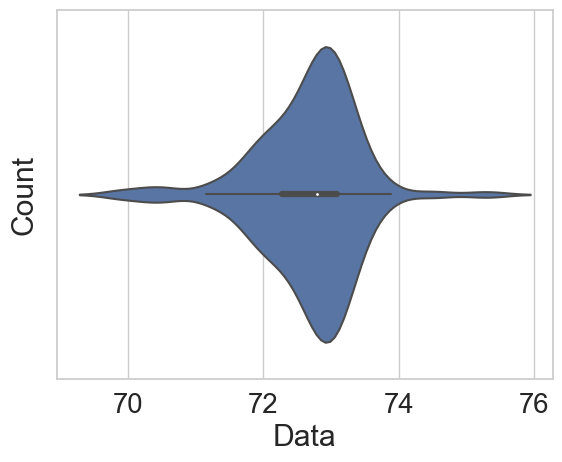

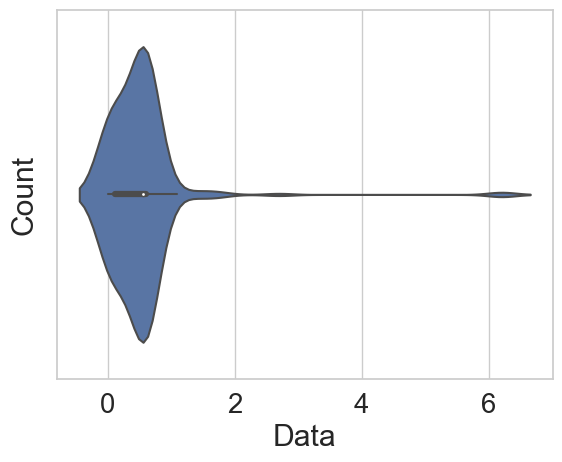

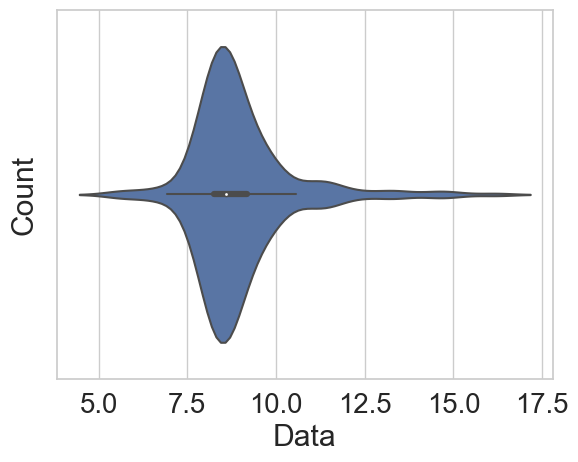

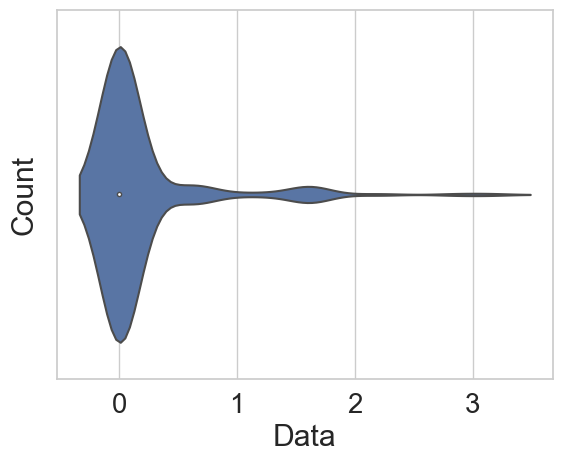

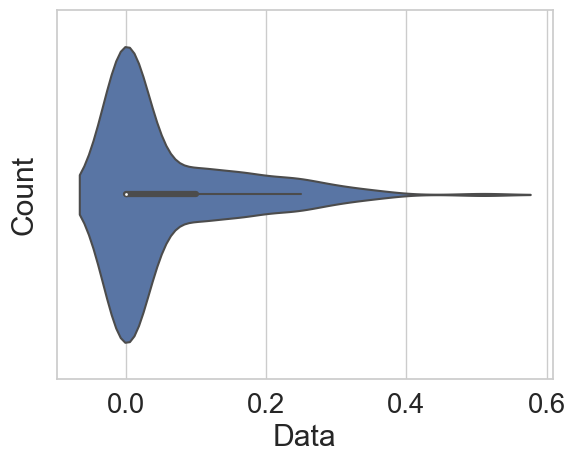

In [13]:
# show X distribution of values as a violin plot of each column
for col in X.columns:
    sns.violinplot(x=X[col])
    plt.xlabel('Data')
    plt.ylabel('Count')
    plt.show()

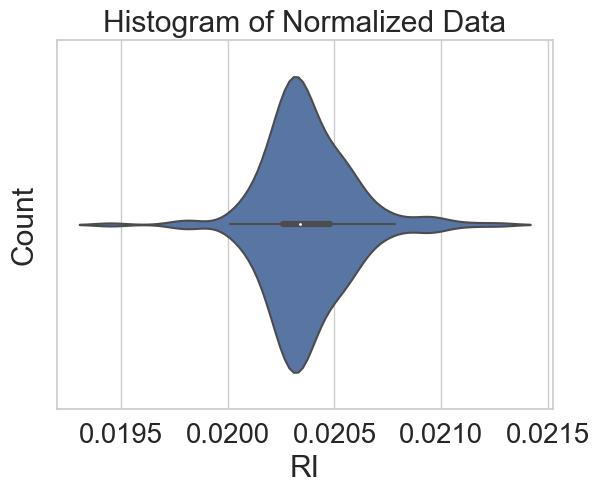

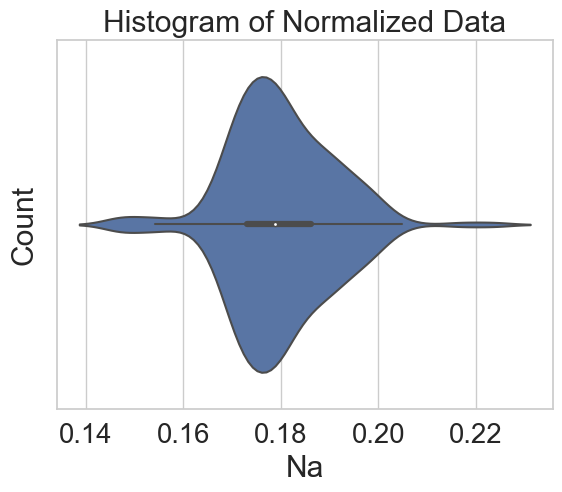

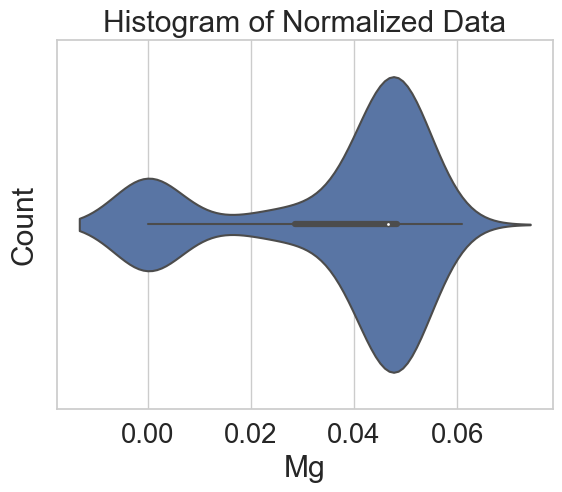

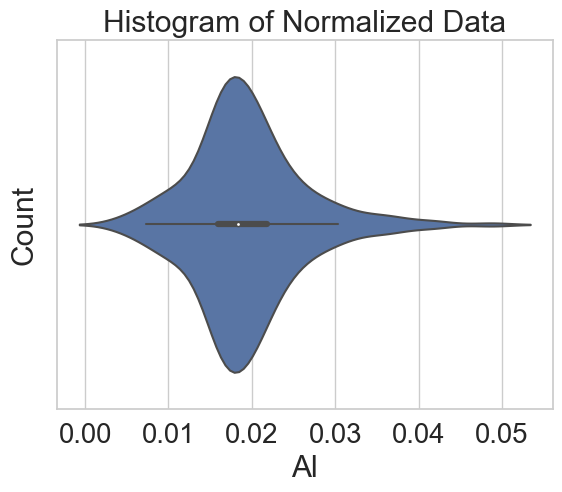

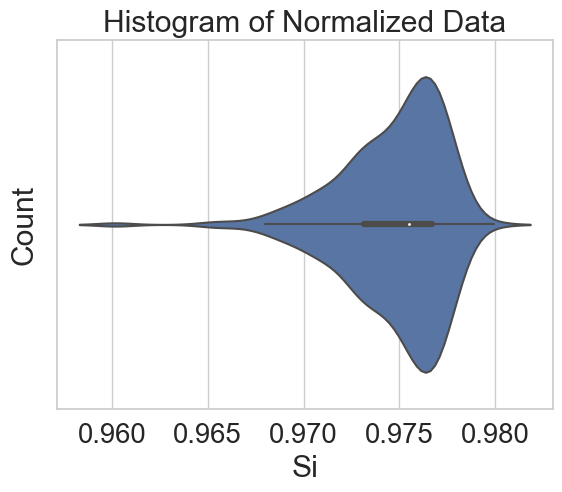

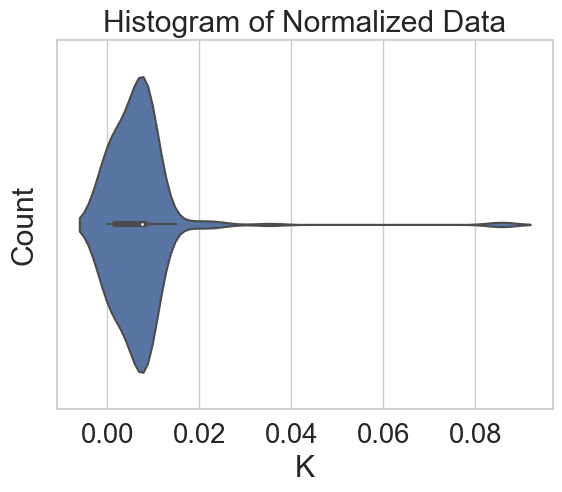

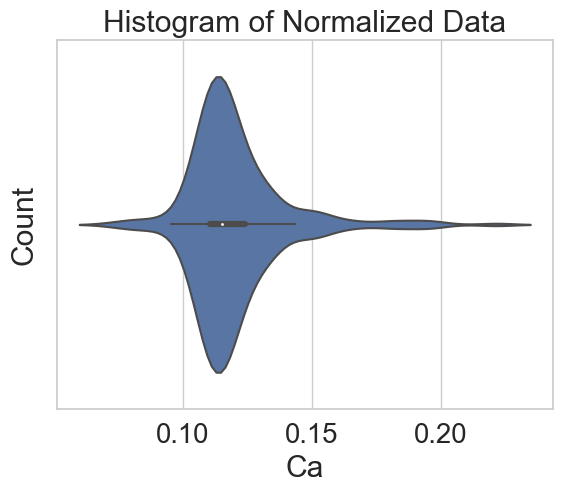

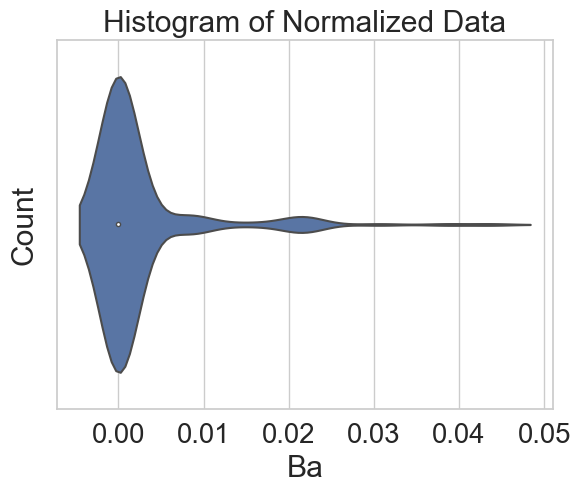

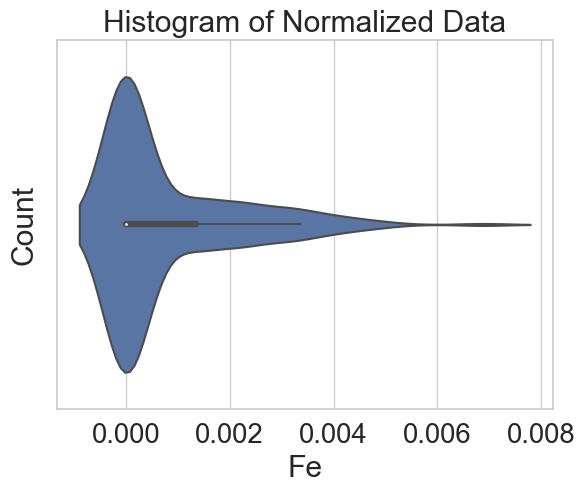

In [14]:
# Normalizer
normalized_X = Normalizer().fit_transform(X)

normalized_X_DF = pd.DataFrame(normalized_X, columns=X.columns)

# show results as a violin plot of each column

for column in normalized_X_DF.columns:
    sns.violinplot(x=normalized_X_DF[column])
    plt.xlabel(normalized_X_DF[column].name)
    plt.ylabel('Count')
    plt.title('Histogram of Normalized Data')
    plt.show()





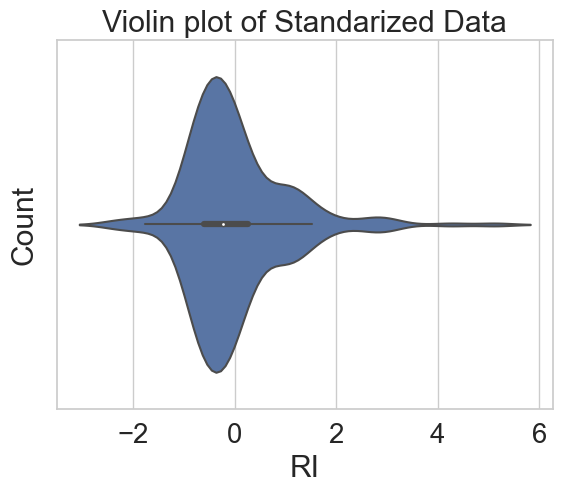

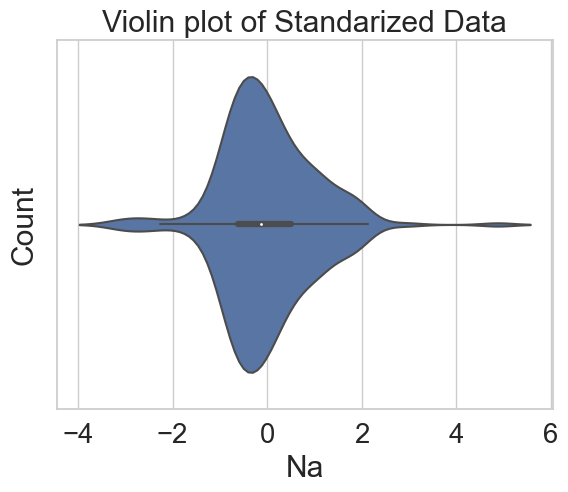

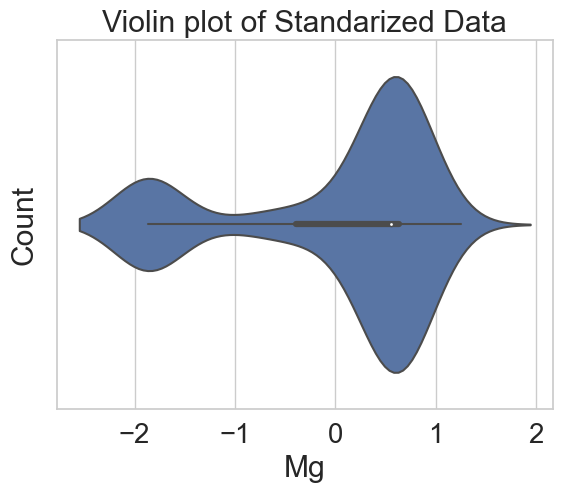

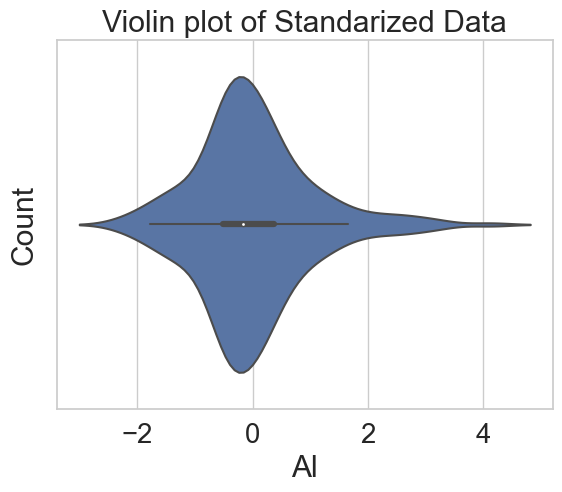

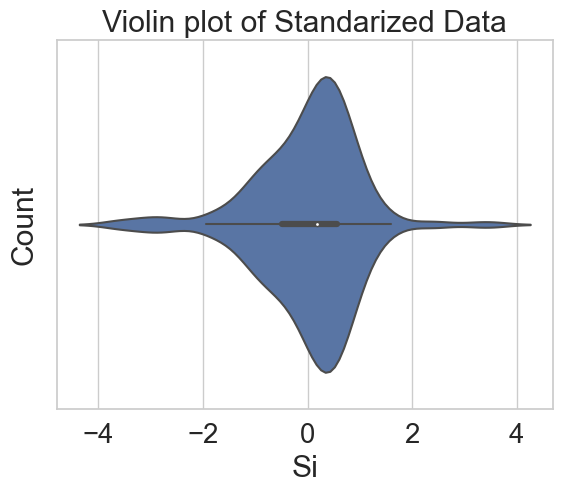

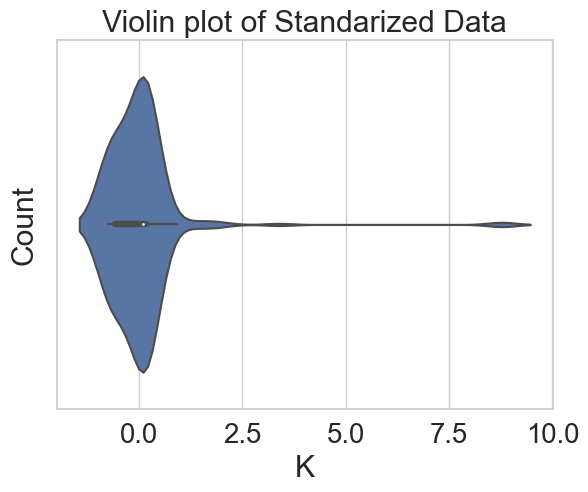

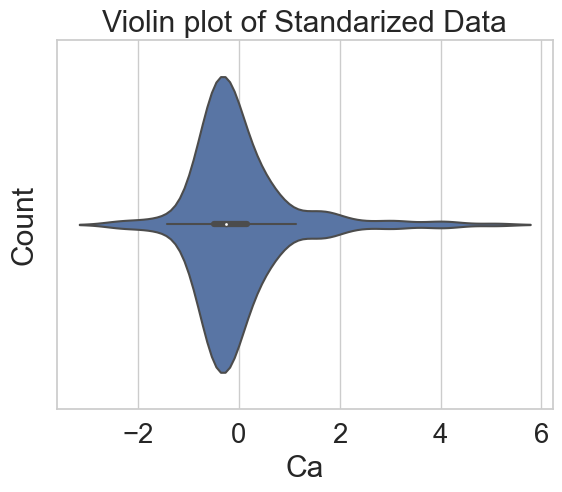

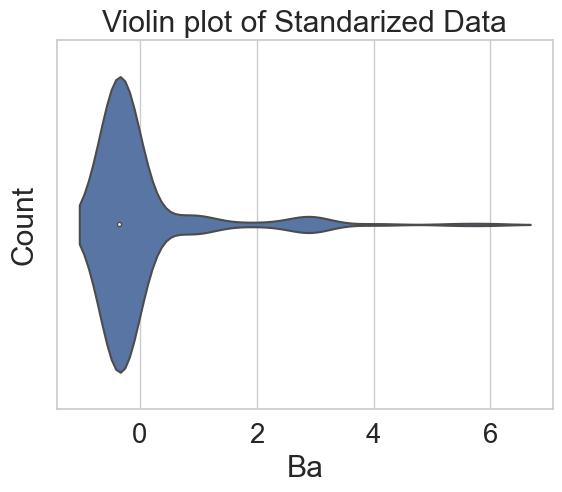

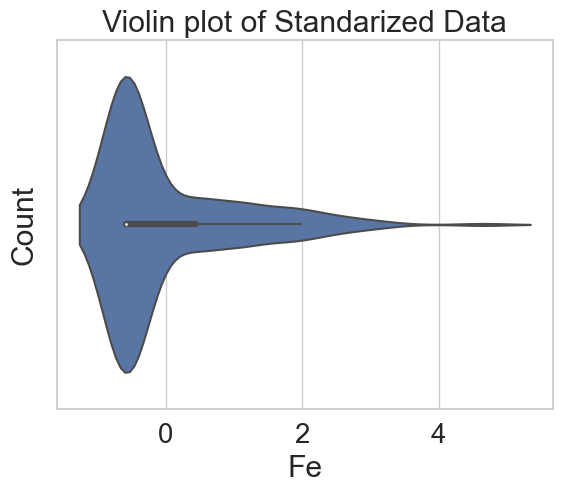

In [15]:
# standarize data and store it in standarized_X variable
standarized_X = StandardScaler().fit_transform(X)
# show first 5 rows of standarized_X
standarized_X_DF = pd.DataFrame(standarized_X, columns=X.columns)

#  i want to display histogram of eacy column in standarized_X_DF as a violin plot
for column in standarized_X_DF.columns:
    sns.violinplot(x=standarized_X_DF[column])
    plt.xlabel(standarized_X_DF[column].name)
    plt.ylabel('Count')
    plt.title('Violin plot of Standarized Data')
    plt.show()


In [16]:

# PCA - Principal Component Analysis - reduce dimensionality of data
# use PCA to reduce dimensionality of data of X 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_DF.head()

,PC1,PC2
0,-1.431425,-1.102115
1,-1.436707,0.343585
2,-1.427322,0.345720
3,-1.257825,-0.249060
4,-1.312466,-0.018405


Text(0.5, 1.0, 'PCA')

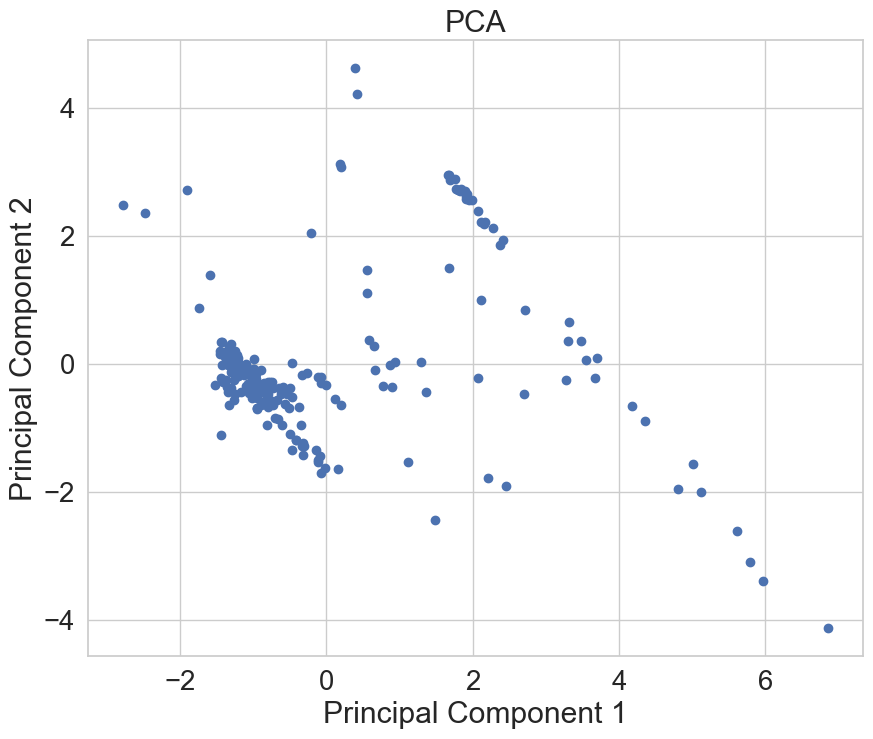

In [17]:
# show PCA results as a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(principal_DF['PC1'], principal_DF['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')

In [18]:
# discrete data X to discrete_X
discrete_X = pd.DataFrame(pd.cut(X['RI'], bins=3, labels=[1, 2, 3]))
discrete_X.head()


,RI
0,2
1,1
2,1
3,1
4,1


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=53, stratify=y)
# show first 5 rows of X_train
X_train.head()




,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.0
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.0,0.3
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.0,0.0
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.0


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=53, stratify=y)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.0
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.0,0.3
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.0,0.0
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.0


zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)

In [21]:
# split data into train and vaildation sets for each of X and y sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=53, stratify=y)

X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(normalized_X, y, test_size=0.3, random_state=53, stratify=y)

X_train_stand, X_val_stand, y_train_stand, y_val_stand = train_test_split(standarized_X, y, test_size=0.3, random_state=53, stratify=y)

X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(principal_DF, y, test_size=0.3, random_state=53, stratify=y)

X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete = train_test_split(discrete_X, y, test_size=0.3, random_state=53, stratify=y)

In [22]:
# how to show splited data
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

print(X_train_norm.shape, X_val_norm.shape, y_train_norm.shape, y_val_norm.shape)

print(X_train_stand.shape, X_val_stand.shape, y_train_stand.shape, y_val_stand.shape)

print(X_train_pca.shape, X_val_pca.shape, y_train_pca.shape, y_val_pca.shape)

print(X_train_discrete.shape, X_val_discrete.shape, y_train_discrete.shape, y_val_discrete.shape)




(149, 9) (65, 9) (149,) (65,)
(149, 9) (65, 9) (149,) (65,)
(149, 9) (65, 9) (149,) (65,)
(149, 2) (65, 2) (149,) (65,)
(149, 1) (65, 1) (149,) (65,)


In [23]:
## Flattening the array
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)

In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:

# make a functiion that will train and test model as arguments it gest data and model and returns accuracy, precision, recall, f1
def train_and_test_model(X_train, X_val, y_train, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# train and test model of naive bayes GaussianNB of each data, not processed, normalized, standarized, PCA, discrete
accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)


Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.49230769230769234
Precision:  0.4173076923076923
Recall:  0.49230769230769234
F1:  0.4249013806706114
Accuracy:  0.4153846153846154
Precision:  0.2762138570649209
Recall:  0.4153846153846154
F1:  0.3181741335587489


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:

accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy, precision, recall, f1 = train_and_test_model(X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)


Accuracy:  0.6615384615384615
Precision:  0.6842654713707345
Recall:  0.6615384615384615
F1:  0.6631242044008001
Accuracy:  0.6307692307692307
Precision:  0.6593223443223444
Recall:  0.6307692307692307
F1:  0.6344273994776146
Accuracy:  0.6615384615384615
Precision:  0.7025591715976331
Recall:  0.6615384615384615
F1:  0.6672489540621409


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6
Precision:  0.6234995773457311
Recall:  0.6
F1:  0.5995754245754246
Accuracy:  0.4153846153846154
Precision:  0.2762138570649209
Recall:  0.4153846153846154
F1:  0.3181741335587489


klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)



In [27]:
def dt_classifiers_create():
    dt_params = [
        {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 15, 'min_samples_split': 5, 'criterion': 'gini'}
    ]

    dt_classifiers = []
    for params in dt_params:
        dt = DecisionTreeClassifier(criterion=params.get('criterion'), max_depth=params.get('max_depth'),
                                    min_samples_split=params.get('min_samples_split'))
        dt_classifiers.append(dt)

    return dt_classifiers

# NB classifiers
def nb_classifiers_create():
    nb_params = [
        1e-9,
        1e-8,
        1e-7
    ]
    nb_classifiers = []

    for param in nb_params:
        nb = GaussianNB(var_smoothing=param)
        nb_classifiers.append(nb)

    return nb_classifiers

In [28]:
# create a function that will iterate of each classifier and show results
def iterate_classifiers(classifiers, X_train, X_val, y_train, y_val):
    for classifier in classifiers:
        accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, classifier)
        print('Accuracy: ', accuracy)
        print('Precision: ', precision)
        print('Recall: ', recall)
        print('F1: ', f1)
        print('--------------------------------------')

# iterate over NB classifiers
nb_classifiers = nb_classifiers_create()
iterate_classifiers(nb_classifiers, X_train_norm, X_val_norm, y_train_norm, y_val_norm)




Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
--------------------------------------
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
--------------------------------------
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
--------------------------------------


In [29]:
# iterate over DT classifiers
dt_classifiers = dt_classifiers_create()
iterate_classifiers(dt_classifiers, X_train_norm, X_val_norm, y_train_norm, y_val_norm)

Accuracy:  0.6307692307692307
Precision:  0.5898901098901099
Recall:  0.6307692307692307
F1:  0.6059527400703871
--------------------------------------
Accuracy:  0.6307692307692307
Precision:  0.6464102564102564
Recall:  0.6307692307692307
F1:  0.6326437265424953
--------------------------------------
Accuracy:  0.6615384615384615
Precision:  0.662948717948718
Recall:  0.6615384615384615
F1:  0.6597928669957731
--------------------------------------


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
